In [33]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\MEDINA TECH\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [34]:
!nvidia-smi

Fri Apr  1 21:43:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.19       Driver Version: 472.19       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0    N/A /  N/A |     88MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
!pip install tensorflow-gpu

You should consider upgrading via the 'c:\users\medina tech\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [37]:
IMAGE_SIZE = [224, 224]
TRAIN_PATH = 'E:/PureStrength_COCOcandidate_task/training'
VALIDATION_PATH = 'E:/PureStrength_COCOcandidate_task/validation'
TEST_IMAGE = 'E:/Screenshot 2022-04-01 at 18-30-49 eb895d0ccd0a497da02bf97b1238f9b0.pdf.png'

In [38]:
folders = glob('E:/PureStrength_COCOcandidate_task/training/*')

In [39]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
for layer in inception.layers:
    layer.trainable = False

In [41]:
flatten = Flatten()(inception.output)

In [42]:
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(len(folders), activation="softmax")(bboxHead)

In [43]:
model = Model(inputs=inception.input, outputs=bboxHead)

In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [47]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [60]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [61]:
training_set = train_datagen.flow_from_directory('E:/PureStrength_COCOcandidate_task/training/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 107 images belonging to 12 classes.


In [62]:
trained_model = model.fit(
  training_set,
  epochs=100,
  steps_per_epoch=len(training_set)
)

Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 1.0579 - accuracy: 0.5701
Epoch 2/100
4/4 [==============================] - 16s 4s/step - loss: 0.8984 - accuracy: 0.6075
Epoch 3/100
4/4 [==============================] - 15s 3s/step - loss: 0.8477 - accuracy: 0.6822
Epoch 4/100
4/4 [==============================] - 14s 3s/step - loss: 1.0030 - accuracy: 0.6075
Epoch 5/100
4/4 [==============================] - 14s 3s/step - loss: 1.2218 - accuracy: 0.6355
Epoch 6/100
4/4 [==============================] - 14s 3s/step - loss: 0.9469 - accuracy: 0.6075
Epoch 7/100
4/4 [==============================] - 15s 3s/step - loss: 0.7598 - accuracy: 0.7103
Epoch 8/100
4/4 [==============================] - 14s 3s/step - loss: 0.9567 - accuracy: 0.6822
Epoch 9/100
4/4 [==============================] - 15s 3s/step - loss: 0.6988 - accuracy: 0.6636
Epoch 10/100
4/4 [==============================] - 16s 4s/step - loss: 0.7189 - accuracy: 0.7664
Epoch 11/100
4/4 [============

In [63]:
model.save('E:/PureStrength_COCOcandidate_task.h5')

In [65]:
from tensorflow.keras.models import load_model
model=load_model('E:/PureStrength_COCOcandidate_task.h5')

In [66]:
img=image.load_img(TEST_IMAGE,target_size=(224, 224))

In [67]:
img_arr=image.img_to_array(img)
img_arr

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 253.],
        [189., 174., 145.],
        [190., 175., 146.],
        ...,
        [166., 137., 119.],
        [159., 130., 112.],
        [153., 126., 109.]],

       [[254., 254., 253.],
        [189., 174., 145.],
        [190., 175., 146.],
        ...,
        [162., 142., 118.],
        [155., 135., 111.],
        [152., 134., 111.]],

       ...,

       [[254., 253., 253.],
        [198., 123., 119.],
        [198., 123., 119.],
        ...,
        [216., 127., 122.],
        [216., 127., 122.],
        [216., 127., 122.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [68]:
img_arr.shape

(224, 224, 3)

In [69]:
img_arr=img_arr/255

In [70]:
img_arr=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(img_arr)
img_data.shape

(1, 224, 224, 3)

In [74]:
pred = model.predict(img_data)
print(pred)

[[9.7490169e-02 3.0295821e-04 1.0977559e-02 4.7787834e-02 6.1277725e-02
  1.0633638e-02 2.8916660e-01 1.2272325e-03 9.4993524e-03 1.0764167e-02
  1.5013267e-01 3.1073999e-01]]


In [75]:
classes = np.array(['in_field', 'olympic_barbell', 'person_benching_in_gym', 'person_deadlifting_in_gym', 'person_squatting_in_gym', 'powerlifting_bench', 'powerlifting_deadlift', 'powerlifting_squat', 'random', 'side_on_deadlift', 'squatrack', 'vlcsnap'])
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])

vlcsnap (0.31074)
powerlifting_deadlift (0.28917)
[[9.7490169e-02 3.0295821e-04 1.0977559e-02 4.7787834e-02 6.1277725e-02
  1.0633638e-02 2.8916660e-01 1.2272325e-03 9.4993524e-03 1.0764167e-02
  1.5013267e-01 3.1073999e-01]]
probability:0.31074
vlcsnap


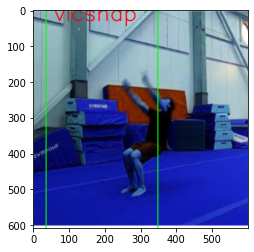

-1

In [24]:
import cv2, imutils
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
model = load_model('E:/PureStrength_COCOcandidate_task.h5')
classes = np.array(['in_field', 'olympic_barbell', 'person_benching_in_gym', 'person_deadlifting_in_gym', 'person_squatting_in_gym', 'powerlifting_bench', 'powerlifting_deadlift', 'powerlifting_squat', 'random', 'side_on_deadlift', 'squatrack', 'vlcsnap'])
TEST_IMAGE = 'E:/Screenshot 2022-04-01 at 18-30-49 eb895d0ccd0a497da02bf97b1238f9b0.pdf.png'
img=image.load_img(TEST_IMAGE,target_size=(224, 224))
img_arr=image.img_to_array(img)
img_arr
img_arr.shape
img_arr=img_arr/255
img_arr=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(img_arr)
pred = model.predict(img_data)
itemindex = np.where(pred == np.max(pred))
(startX, startY, endX, endY) = pred[:, 0], pred[:, 1], pred[:, 2], pred[:, 3]
test_image = cv2.imread(TEST_IMAGE)
test_image = imutils.resize(test_image, width=600)
(h, w) = test_image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
output = cv2.rectangle(test_image, (startX * endX, startY * endY), (endX * endX, endY * endY), (0, 255, 0), 2)
output = cv2.putText(test_image, classes[itemindex[1][0]], (startX, endY), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)
cv2.imshow("Output", test_image)
cv2.imwrite('E:/PureStrength_COCOcandidate_task.jpg', test_image)
plt.imshow(output)
plt.show()
cv2.waitKey(0)